<a href="https://colab.research.google.com/github/zzackkk/Credit-Card-Customer-Churn-Prediction/blob/main/churn_rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import numpy as np
import pandas as pd

In [50]:
df = pd.read_csv('Churn_Modelling.csv')

In [51]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [52]:
df



,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [53]:
h1 = pd.get_dummies(df, columns=['Geography','Gender'], drop_first=True)

In [54]:
X = h1.drop(columns=['Exited'])
y =h1["Exited"].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [55]:
X_train.shape

(8000, 11)

In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [57]:
X_train.shape

(8000, 11)

In [58]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [59]:
model = Sequential()
model.add(Dense(3, activation='sigmoid', input_dim =11))
model.add(Dense(1,activation='sigmoid'))



In [60]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 3)                 36        
                                                                 
 dense_5 (Dense)             (None, 1)                 4         
                                                                 
Total params: 40
Trainable params: 40
Non-trainable params: 0
_________________________________________________________________


In [61]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [62]:
history = model.fit(X_train,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
128/128 [==============================] - 1s 2ms/step - loss: 0.7984 - accuracy: 0.3941 - val_loss: 0.7583 - val_accuracy: 0.3988
Epoch 2/100
128/128 [==============================] - 0s 2ms/step - loss: 0.7271 - accuracy: 0.3969 - val_loss: 0.6960 - val_accuracy: 0.3988
Epoch 3/100
128/128 [==============================] - 0s 2ms/step - loss: 0.6709 - accuracy: 0.5895 - val_loss: 0.6464 - val_accuracy: 0.7950
Epoch 4/100
128/128 [==============================] - 0s 2ms/step - loss: 0.6270 - accuracy: 0.7933 - val_loss: 0.6079 - val_accuracy: 0.7969
Epoch 5/100
128/128 [==============================] - 0s 2ms/step - loss: 0.5934 - accuracy: 0.7958 - val_loss: 0.5790 - val_accuracy: 0.7969
Epoch 6/100
128/128 [==============================] - 0s 2ms/step - loss: 0.5682 - accuracy: 0.7958 - val_loss: 0.5571 - val_accuracy: 0.7969
Epoch 7/100
128/128 [==============================] - 0s 2ms/step - loss: 0.5496 - accuracy: 0.7958 - val_loss: 0.5409 - val_accuracy: 0.7969

In [63]:
y_pred = model.predict(X_test)


63/63 [==============================] - 0s 750us/step


In [64]:
y_pred

array([[0.17774042],
       [0.17774042],
       [0.24074146],
       ...,
       [0.24074146],
       [0.24074146],
       [0.17774042]], dtype=float32)

In [65]:
y_pred = y_pred.argmax(axis=-1)

In [66]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7975

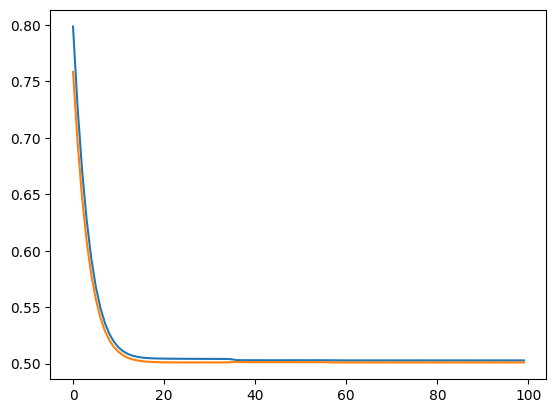

In [67]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

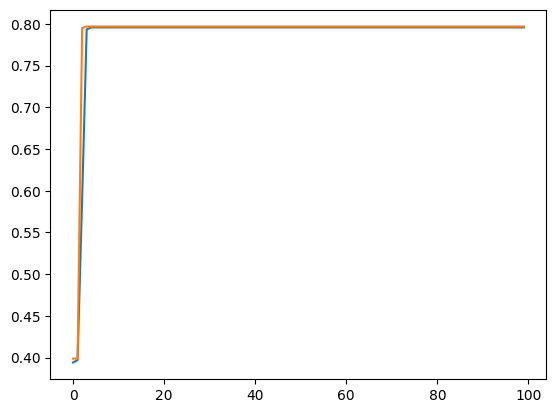

In [68]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
